<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/RupeshThapa_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import random
import math

In [ ]:
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
class Perceptron():
  def __init__(self,input_size = 2, lr = 0.01, epochs =20):
    self.lr = lr
    self.epochs = epochs
    self.input_size = input_size
    self.w = np.random.uniform(-1,1, size = (input_size))
    self.bias = random.uniform(-1,1)
    self.misses = []

  def predict(self, X):
    w = self.w
    b = self.bias
    z = sigmoid(np.dot(X, self.w) + b)

    if z > 0.5:
      return 1
    else:
      return 0

  def fit(self, X, y):

    for epoch in range(self.epochs):
      miss = 0
      for yi, xi in zip(y, X):
        y_pred = self.predict(xi)
        error = yi - y_pred
        self.w += self.lr*error*xi
        self.bias += self.lr*error
        miss += int(error != 0.0)
      self.misses.append(miss)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

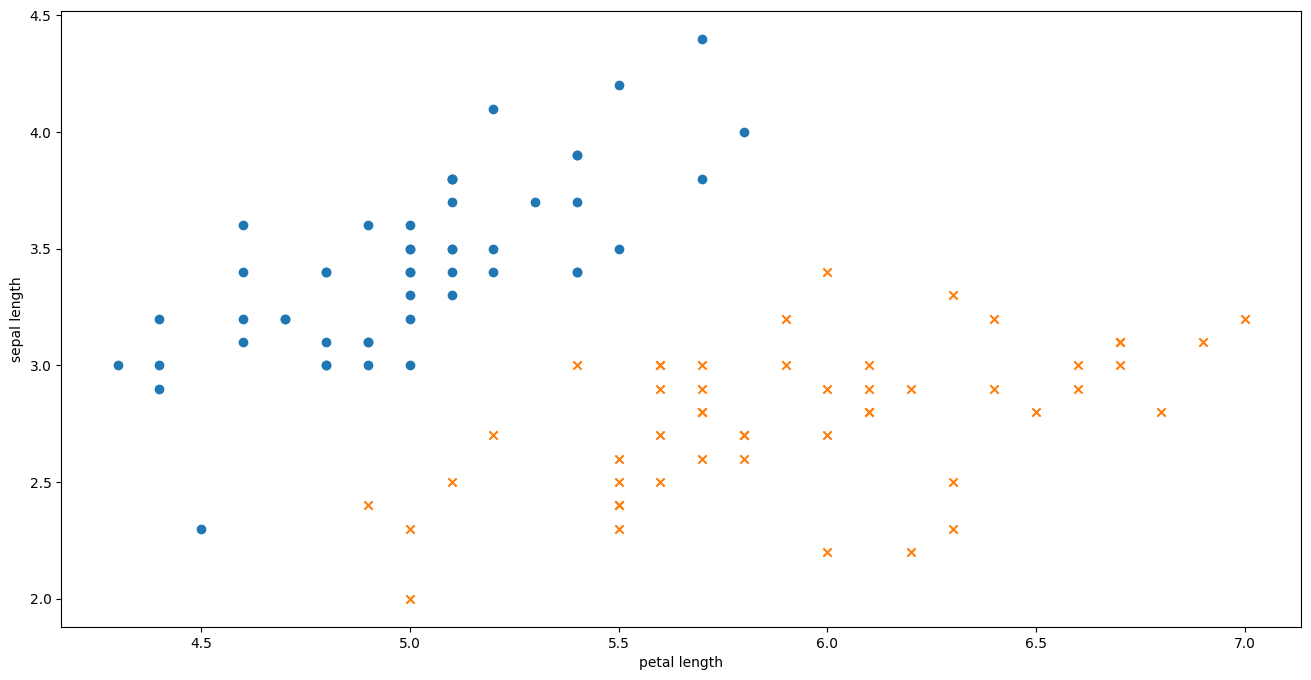

In [ ]:
import matplotlib.pyplot as plt

X = X[:100, [0, 1]]
y = y[y<2]

plt.figure(figsize=(16,8))
plt.scatter(X[:50,0], X[:50,1], marker='o', label='setosa')
plt.scatter(X[50:,0], X[50:,1], marker='x', label='virginica')
plt.ylabel('sepal length')
plt.xlabel('petal length')
plt.show()

In [ ]:
perceptron = Perceptron()
perceptron.fit(X, y)
print(perceptron.w, perceptron.bias)

[-0.1686441   0.20569461] 0.8527981694214577


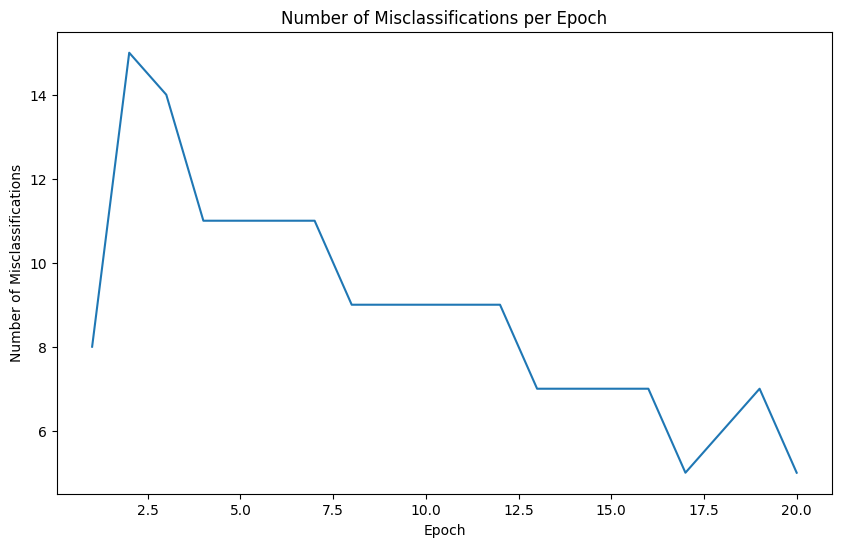

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(perceptron.misses) + 1), perceptron.misses)
plt.title('Number of Misclassifications per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.show()